# 2. 깊이 우선 탐색(Depth-First Search)
__1. BFS와 DFS 란?__
- 대표적인 그래프 __탐색__알고리즘
    - 너비 우선 탐색(Breadth First Search) : 정점들과 같은 레벨에 있는 노드들 (형제 노드들)을 먼저 탐색하는 방식
    - 깊이 우선 탐색 (Depth First Search) : 정점의 자식들을 먼저 탐색하는 방식

__BFS/DFS 방식을 이해를 위한 예제__
- BFS 방식 : A - B - C - D - G - H - I - E - F - J
    - 한 단계씩 내려가면서, 해당 노드와 같은 레벨에 있는 노드들 (형제 노드들)을 먼저 순회함
- DFS 방식 : A - B - D - E - F - C - G - H - I - J
    - 한 노드의 자식을 타고 끝까지 순회한 후, 다시 돌아와서 다른 형제들의 자식을 타고 내려가며 순회함

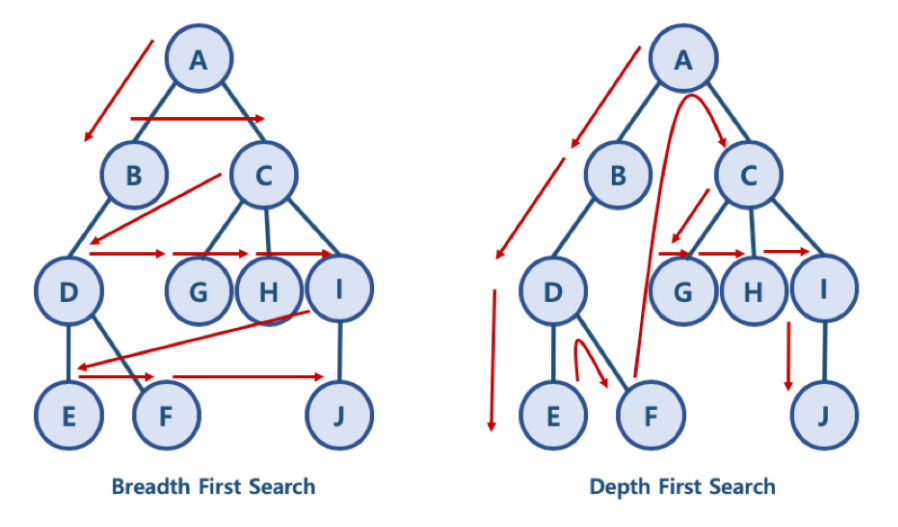

__2. 파이썬으로 그래프를 표현하는 방법__
- 파이썬에서 제공하는 딕셔너리와 리스트 자료 구조를 활용해서 그래프를 표현할 수 있음

In [2]:
graph = dict()

graph['A'] = ['B', 'C']
graph['B'] = ['A', 'D']
graph['C'] = ['A', 'G', 'H', 'I']
graph['D'] = ['B', 'E', 'F']
graph['E'] = ['D']
graph['F'] = ['D']
graph['G'] = ['C']
graph['H'] = ['C']
graph['I'] = ['C', 'J']
graph['J'] = ['I']

graph

{'A': ['B', 'C'],
 'B': ['A', 'D'],
 'C': ['A', 'G', 'H', 'I'],
 'D': ['B', 'E', 'F'],
 'E': ['D'],
 'F': ['D'],
 'G': ['C'],
 'H': ['C'],
 'I': ['C', 'J'],
 'J': ['I']}

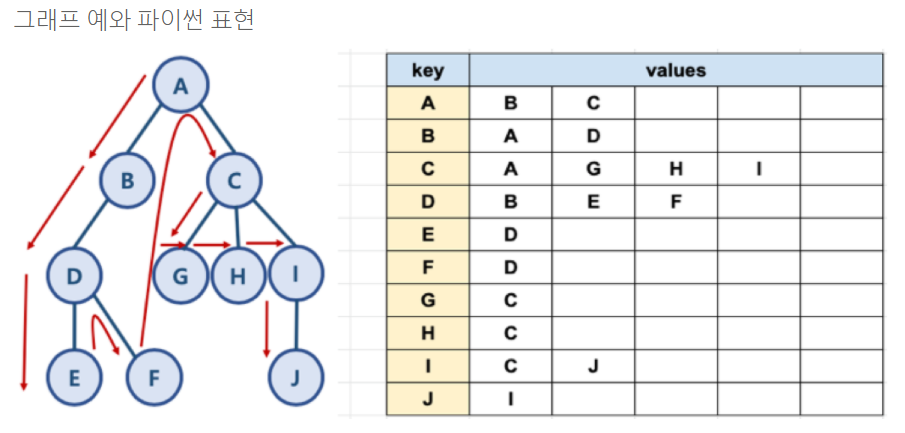

__3. DFS 알고리즘 구현__
- 자료구조 스택과 큐를 활용함
    - need_visit 스태고가 visited 큐, 두 개의 자료 구조를 생성
>  BFS 자료구조는 두 개의 큐를 활용하는데 반해, DFS는 스택과 큐를 활용한다는 차이가 있음을 인지해야 함

- 큐와 스택 구현은 별도 라이브러리를 활용할 수도 있지만, 간단한 파이썬 리스트를 활용할 수도 있다.

In [4]:
graph

{'A': ['B', 'C'],
 'B': ['A', 'D'],
 'C': ['A', 'G', 'H', 'I'],
 'D': ['B', 'E', 'F'],
 'E': ['D'],
 'F': ['D'],
 'G': ['C'],
 'H': ['C'],
 'I': ['C', 'J'],
 'J': ['I']}

__위의 graph를 dfs 알고리즘을 활용한 탐색 작성해보자__

In [18]:
def dfs(graph, start_node):
    visited = list()
    need_visit = list()
    need_visit.append(start_node)
    
    while need_visit:
        print('need_visit : ', need_visit)
        node = need_visit.pop()
        if node not in visited:
            visited.append(node)
            need_visit.extend(graph[node])

    return visited

In [19]:
dfs(graph, 'A')

need_visit :  ['A']
need_visit :  ['B', 'C']
need_visit :  ['B', 'A', 'G', 'H', 'I']
need_visit :  ['B', 'A', 'G', 'H', 'C', 'J']
need_visit :  ['B', 'A', 'G', 'H', 'C', 'I']
need_visit :  ['B', 'A', 'G', 'H', 'C']
need_visit :  ['B', 'A', 'G', 'H']
need_visit :  ['B', 'A', 'G', 'C']
need_visit :  ['B', 'A', 'G']
need_visit :  ['B', 'A', 'C']
need_visit :  ['B', 'A']
need_visit :  ['B']
need_visit :  ['A', 'D']
need_visit :  ['A', 'B', 'E', 'F']
need_visit :  ['A', 'B', 'E', 'D']
need_visit :  ['A', 'B', 'E']
need_visit :  ['A', 'B', 'D']
need_visit :  ['A', 'B']
need_visit :  ['A']


['A', 'C', 'I', 'J', 'H', 'G', 'B', 'D', 'F', 'E']

extend 함수는, append와 유사하지만, list단위를 추가해줌

__4. 시간 복잡도__
- 일반적인 DFS 시간 복잡도
    - 노드 수 : v
    - 간선 수 : E
        - 위 코드에서 while need_visit 은 V+E번 만큼 수행함
    - 시간 복잡도 : O(V+E)